# Assignment 1 - Car Price Prediction

**`Name              - ID`**<br>
>`Tasneem Qat         - 0201502`<br>
>`Leen Abderrahman    - 0207898`

**1. Importing the data and observing its structure**<br>
*Importing the pandas library, using it to load and read the provided csv file, and exploring the first 5 entries of the dataset*

In [1]:
import pandas as pd
cars_df = pd.read_csv("car_prices.csv")
cars_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,price,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


*Exploring the statistical information of the dataset*

In [2]:
cars_df.describe()

,year,condition,odometer,mmr,price
count,21109.000000,16229.000000,21090.000000,21109.000000,21109.000000
mean,2009.259652,29.377904,79132.065149,12829.168838,12429.754654
std,3.334389,13.327577,53263.778096,9562.576918,9571.177068
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,22.000000,36795.250000,6200.000000,5800.000000
50%,2010.000000,33.000000,74053.000000,10850.000000,10400.000000
75%,2012.000000,39.000000,111184.750000,17150.000000,16900.000000
max,2015.000000,49.000000,999999.000000,157000.000000,154000.000000


*Showing the datatypes for each feature of the dataset*

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21109 entries, 0 to 21108
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          21109 non-null  int64  
 1   make          21033 non-null  object 
 2   model         21032 non-null  object 
 3   trim          20947 non-null  object 
 4   body          20521 non-null  object 
 5   transmission  18811 non-null  object 
 6   vin           21109 non-null  object 
 7   state         21109 non-null  object 
 8   condition     16229 non-null  float64
 9   odometer      21090 non-null  float64
 10  color         20523 non-null  object 
 11  interior      18376 non-null  object 
 12  seller        21109 non-null  object 
 13  mmr           21109 non-null  int64  
 14  price         21109 non-null  int64  
 15  saledate      21109 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 2.6+ MB


*Creating a copy of the target feature column*

In [4]:
carprice_labels = cars_df['price'].copy()

**2. Adding new useful features**

*Experimenting with attribute combinations, and adding useful features such as the age of the car, the region it's in, mileage per year, etc.*

In [5]:
cars_df["age"] = 2024 - cars_df["year"]

In [6]:
cars_df['mileage_per_year'] = cars_df['odometer']/cars_df['age']

In [7]:
state_groups = {
    'me': 'Northeast', 'vt': 'Northeast', 'nh': 'Northeast', 'ma': 'Northeast',
    'ri': 'Northeast', 'ct': 'Northeast', 'ny': 'Northeast', 'nj': 'Northeast',
    'pa': 'Northeast', 'de': 'Northeast', 'md': 'Mid-Atlantic', 'va': 'Mid-Atlantic',
    'wv': 'Mid-Atlantic', 'dc': 'Mid-Atlantic', 'nc': 'South', 'sc': 'South', 'ga': 'South',
    'fl': 'South', 'al': 'South', 'ms': 'South', 'la': 'South', 'tx': 'South',
    'ok': 'South Central', 'AR': 'South Central', 'tn': 'South Central', 'ky': 'South Central',
    'mo': 'Mid-West', 'il': 'Mid-West', 'in': 'Mid-West', 'oh': 'Mid-West',
    'mi': 'Mid-West', 'wi': 'Mid-West', 'mn': 'Mid-West', 'ia': 'Mid-West',
    'ks': 'Mid-West', 'nd': 'North Central', 'sd': 'North Central', 'ne': 'North Central',
    'wy': 'Mountain', 'mt': 'Mountain', 'id': 'Mountain', 'ut': 'Mountain',
    'co': 'Mountain', 'az': 'Southwest', 'nm': 'Southwest', 'nv': 'Southwest',
    'ca': 'West Coast', 'or': 'West Coast', 'wa': 'West Coast', 'ak': 'Alaska', 'hi': 'Hawaii', 'qc': 'Canada', 'pr': 'Caribbean', 'ab':'Canada', 'on':'Canada'
}
cars_df['region'] = cars_df['state'].apply(lambda x: state_groups.get(x))

*Fixing repetition found in some features' values due to case sensitivity.*

In [8]:
cars_df['make'] = cars_df['make'].str.upper()
cars_df['model'] = cars_df['model'].str.upper()
cars_df['trim'] = cars_df['trim'].str.upper()
cars_df['body'] = cars_df['body'].str.upper()

*Dealing with saledate's format in a more efficient way*

In [9]:
saledate_df = pd.DataFrame(cars_df['saledate'])

saledate_df['saledate'] = pd.to_datetime(saledate_df['saledate'], utc=True)

saledate_df['month'] = saledate_df['saledate'].dt.month

saledate_df['month_name'] = saledate_df['saledate'].dt.month_name()

saledate_df['year'] = saledate_df['saledate'].dt.year

C:\Users\tasne\AppData\Local\Temp\ipykernel_24920\3202509720.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saledate_df['saledate'] = pd.to_datetime(saledate_df['saledate'], utc=True)


**3. Plotting and visualizing the data to find correlations**

*Plotting the numerical features of the cars in the dataset; the year they were manufactured, their condition, odometer, mmr, price, age, and mileage per year.*

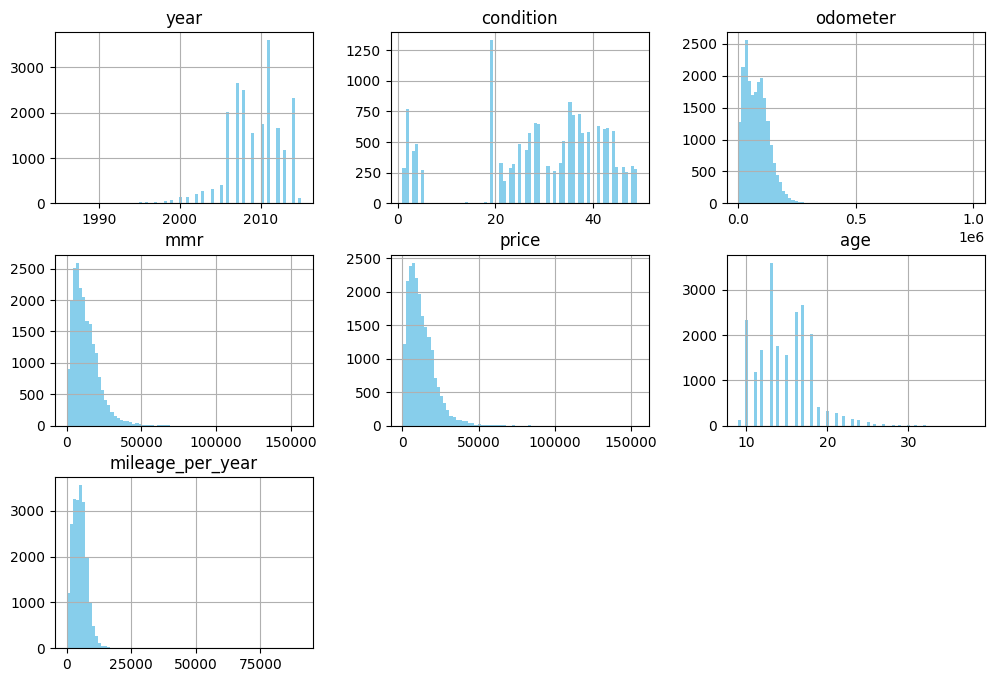

In [10]:
import matplotlib.pyplot as plt
cars_df.hist(bins=75,figsize=(12,8), color='skyblue')
plt.rc('xtick', labelsize=15)
plt.show()

*Plotting Car Price vs. Year*

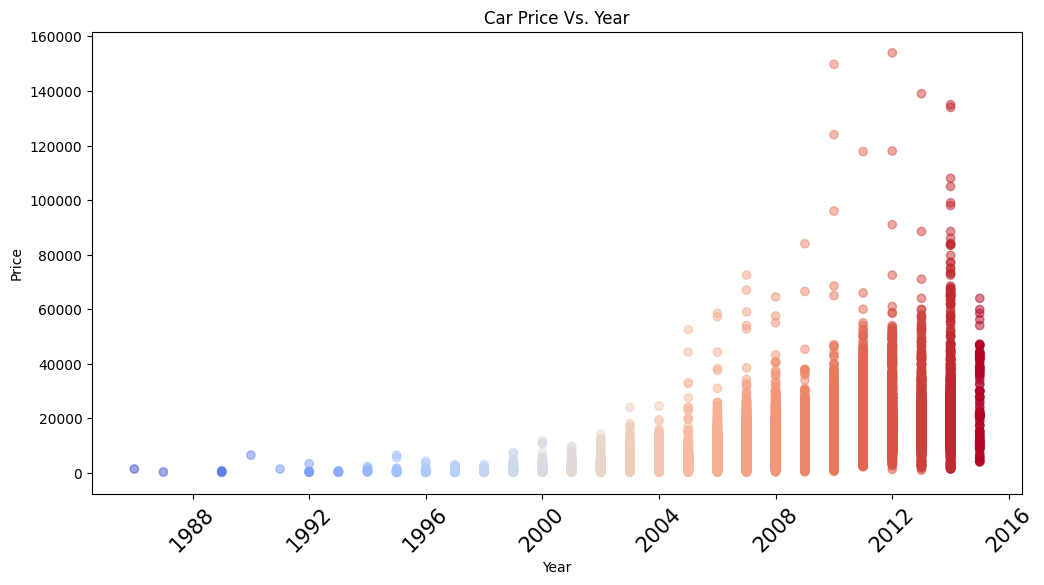

In [11]:
import matplotlib.dates as mdates
dataplot1 = {
    "year": cars_df["year"],
    "price": cars_df["price"],
}

df = pd.DataFrame(dataplot1)

df['year'] = pd.to_datetime(df['year'], format='%Y')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(df['year'], df['price'], alpha=0.5, c=df['year'].dt.year, cmap='coolwarm')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Price Vs. Year')

plt.xticks(rotation=45)
plt.rc('xtick', labelsize=10)
plt.show()

*Plotting Car Price vs. Age*

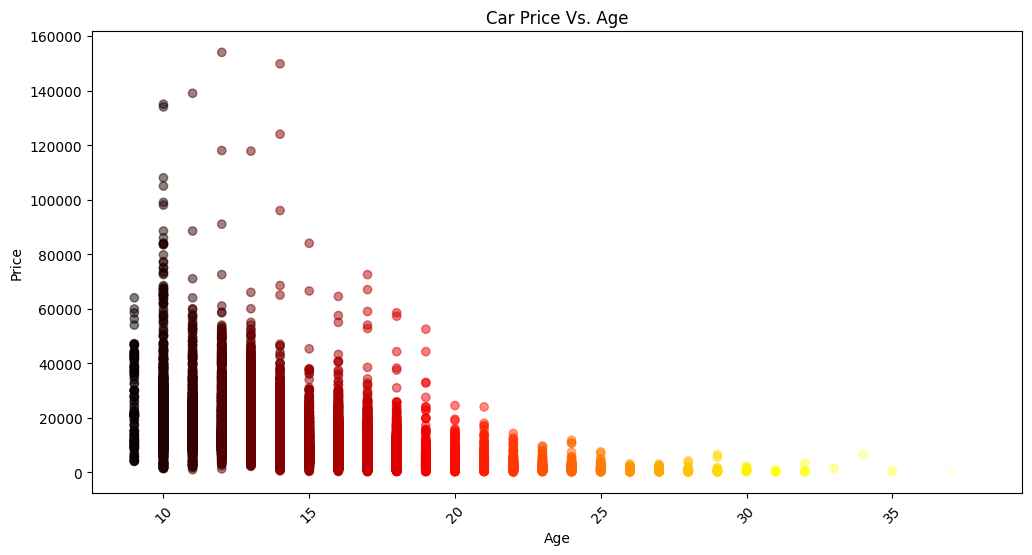

In [12]:
import matplotlib.dates as mdates
dataplot2 = {
    "age": cars_df["age"],
    "price": cars_df["price"],
}

df = pd.DataFrame(dataplot2)

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(df['age'], df['price'], alpha=0.5, c=df['age'], cmap='hot')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Price Vs. Age')

plt.xticks(rotation=45)
plt.rc('xtick', labelsize=10)
plt.show()

*Plotting Car Price vs. Odometer*

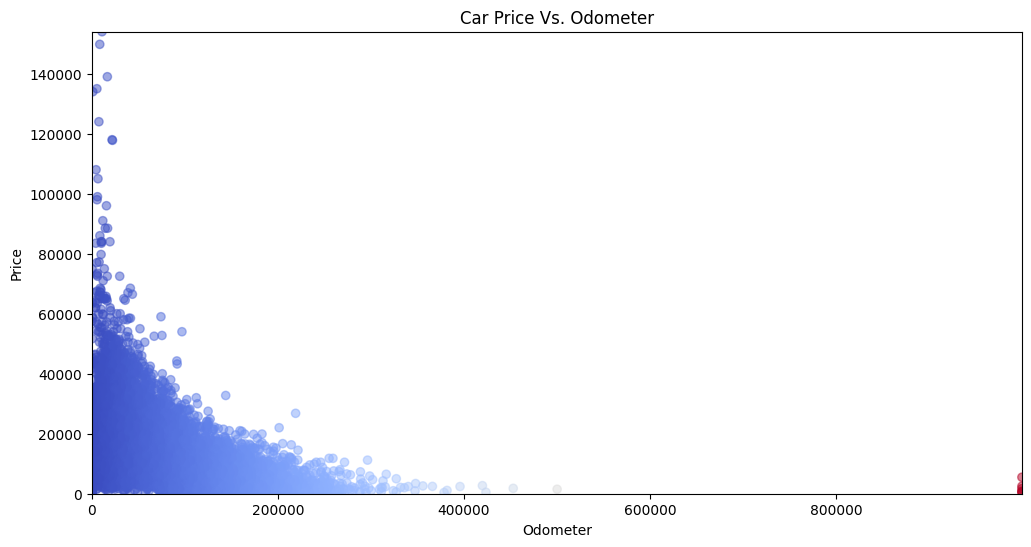

In [13]:
dataplot3 = {
    "odometer": cars_df["odometer"],
    "price": cars_df["price"],
}

df = pd.DataFrame(dataplot3)

fig, ax = plt.subplots(figsize=(12, 6))

#ax.bar(df['odometer'], df['price'], width=10)
ax.scatter(df['odometer'], df['price'], alpha=0.5, c=df['odometer'], cmap='coolwarm')
ax.set_xlim(0, df['odometer'].max())
ax.set_ylim(0, df['price'].max()) 

plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Car Price Vs. Odometer')

plt.rc('xtick', labelsize=10)
plt.show()

*Plotting Car Price vs. MMR*

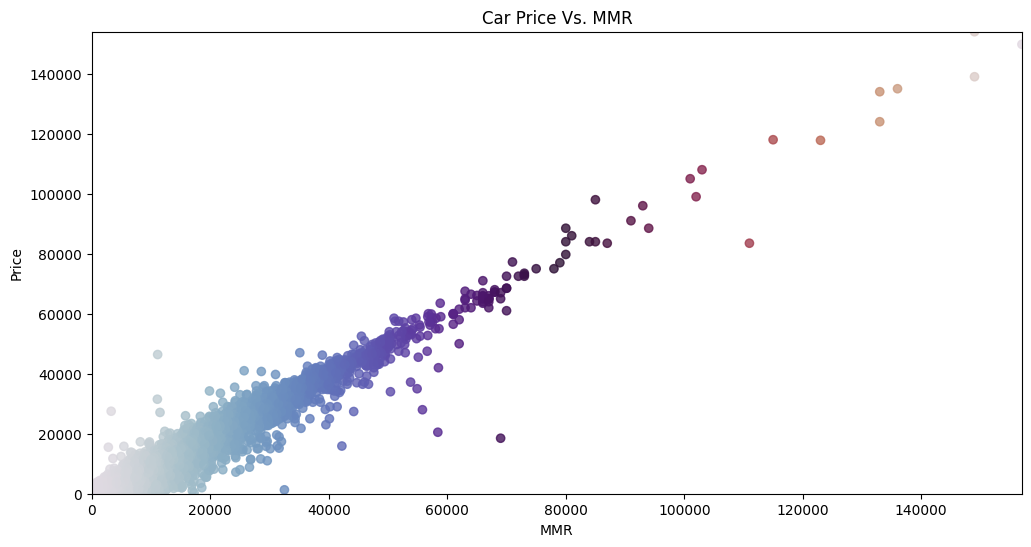

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(cars_df["mmr"], cars_df["price"], alpha=0.8, c=cars_df['mmr'], cmap='twilight')
ax.set_xlim(0, cars_df['mmr'].max())
ax.set_ylim(0, cars_df['price'].max()) 

plt.xlabel('MMR')
plt.ylabel('Price')
plt.title('Car Price Vs. MMR')

plt.rc('xtick', labelsize=10)
plt.show()

*Plotting Car Price vs. Mileage per Year*

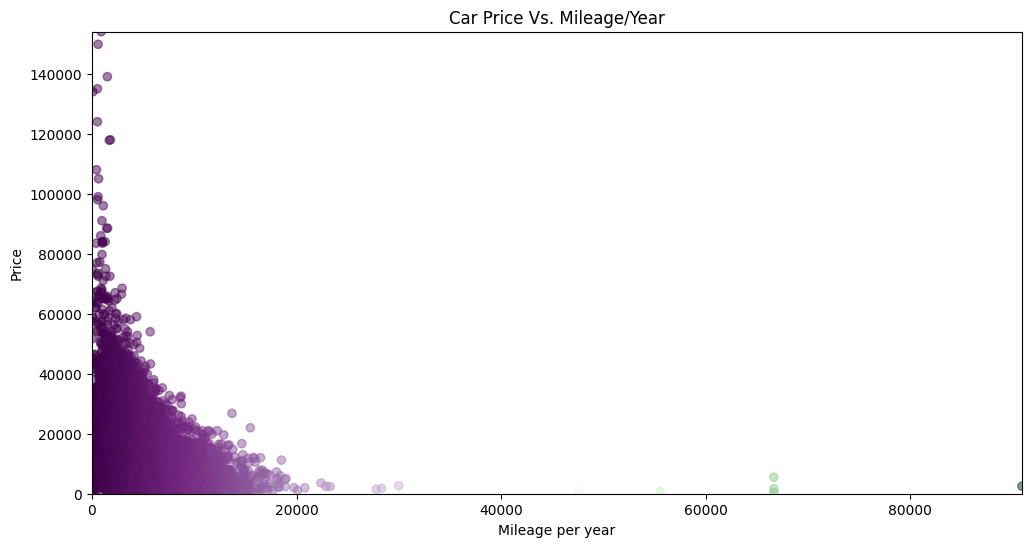

In [15]:
dataplot4 = {
    "mileage_per_year": cars_df["mileage_per_year"],
    "price": cars_df["price"],
}

df = pd.DataFrame(dataplot4)

fig, ax = plt.subplots(figsize=(12, 6))

#ax.bar(df['odometer'], df['price'], width=10)
ax.scatter(df['mileage_per_year'], df['price'], alpha=0.5, c=df['mileage_per_year'], cmap='PRGn')
ax.set_xlim(0, df['mileage_per_year'].max())
ax.set_ylim(0, df['price'].max()) 

plt.xlabel('Mileage per year')
plt.ylabel('Price')
plt.title('Car Price Vs. Mileage/Year')

plt.rc('xtick', labelsize=10)
plt.show()

*Plotting the distribution of car transmissions*

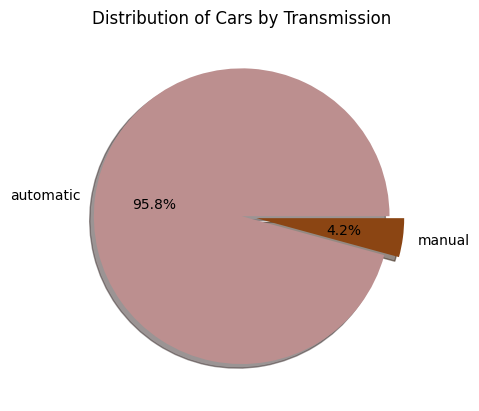

In [16]:
transmission_counts = cars_df['transmission'].value_counts().sort_values(ascending=False)
pie_chart_labels = transmission_counts.index.to_numpy()
pie_chart_values = transmission_counts.to_numpy()
plt.pie(pie_chart_values, labels=pie_chart_labels, autopct="%1.1f%%",  colors=['rosybrown','saddlebrown'], shadow=True, explode=(0,0.1)) 
plt.title("Distribution of Cars by Transmission")
plt.show()

*Plotting car color distribution*<br>
`note: downloading of the Plotly library may be needed to view this interactive chart, to do so, run "pip install Plotly"!`

In [17]:
import plotly.graph_objects as go

values = cars_df['color'].value_counts()
names = cars_df['color'].value_counts().index
colors = ['black', 'white', 'gray', 'silver', 'lightblue', 'indianred', 'gold', 'darkseagreen',
       'darkred', 'beige', 'sienna', 'sandybrown', 'thistle', 'oldlace', 'palegoldenrod',
       'slategray', 'lightseagreen', 'lightpink', 'springgreen']


fig = go.Figure(
  data=[go.Pie(values=values, labels=names, hole=0.7)],
  layout=dict(title='Car Color Percentage', showlegend=True)
)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#DDDDDD', width=1)))
fig.show()


*Plotting Average Price per Year by Top 5 Car Brands*

<Figure size 2000x1000 with 0 Axes>

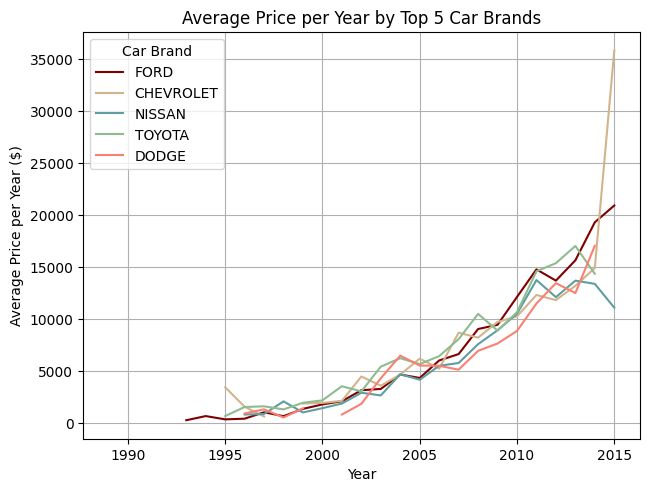

In [18]:
top_5_makes = cars_df['make'].value_counts().sort_values(ascending=False)[:5].index.tolist()
yearly_avg_price = cars_df.groupby(['year', 'make'])['price'].mean().unstack()[top_5_makes]

plt.figure(figsize=(20, 10))
colors = ['maroon', 'tan', 'cadetblue', 'darkseagreen', 'salmon']
yearly_avg_price.plot(color=colors)
plt.legend(title='Car Brand')
plt.grid(True)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Average Price per Year ($)')
plt.title('Average Price per Year by Top 5 Car Brands')
plt.show()

*Finding correlations*

In [19]:
correlation_mat = cars_df.corr(numeric_only=True)
correlation_mat["price"].sort_values(ascending=False)

price               1.000000
mmr                 0.976483
year                0.549858
condition           0.328540
mileage_per_year   -0.482201
odometer           -0.545409
age                -0.549858
Name: price, dtype: float64

*Finding the number of missing values for each feature*

In [20]:
cars_df.isna().sum()

year                   0
make                  76
model                 77
trim                 162
body                 588
transmission        2298
vin                    0
state                  0
condition           4880
odometer              19
color                586
interior            2733
seller                 0
mmr                    0
price                  0
saledate               0
age                    0
mileage_per_year      19
region                 0
dtype: int64

*Importing all important libraries to be used*

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

**4. Preparing for and creating the transformation pipelines**

*Splitting the categorical features depending on their unique value count into ordinal and one-hot*

In [22]:
ordinal_features = ['make', 'model', 'trim', 'body', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
onehot_features = ['transmission', 'region']

*Spliting the dataset into 3: numerical features stored in num_cars, categorical features to be encoded using OrdinalEncoder, and categorical features to be encoded using OneHotEncoder, stored in cat_ordinal_cars and cat_onehot_cars respectively*

In [23]:
num_cars = cars_df.select_dtypes(include=[np.number])
cat_ordinal_cars = cars_df.loc[:,ordinal_features]
cat_onehot_cars = cars_df.loc[:,onehot_features]

*Creating a pipeline for the numerical features to make sure data preparation is done in the right order. It will impute missing values then scale the data.*

In [24]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

*The following code cells create pipelines for imputing and encoding categorical features.*

*Choosing how to encode each feature*

In [25]:
cat_pipeline_ordinal = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OrdinalEncoder()),
    ])

In [26]:
cat_pipeline_onehot = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder()),
    ])

*Converting the previous dataframes to lists*

In [27]:
num_attribs = list(num_cars)
cat_attribs_ordinal = list(cat_ordinal_cars)
cat_attribs_onehot = list(cat_onehot_cars)

*The following column transformer will apply num_pipeline we defined above to the numerical columns/attributes, and in the same way, the cat_pipeline_ordinal and cat_pipeline_onehot to the categorical attributes.*

In [28]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_ordinal", cat_pipeline_ordinal, cat_attribs_ordinal),
    ("cat_onehot", cat_pipeline_onehot, cat_attribs_onehot),
])


*Creating the prepared data using fit_transform*

In [29]:
cars_prepared = full_pipeline.fit_transform(cars_df)

*Next, we extract the feature names and wrap our data in a dataframe cars_prepared_df.*

In [30]:
cars_prepared_df = pd.DataFrame(cars_prepared, columns= full_pipeline.get_feature_names_out())

*The first 5 entries of the new dataframe to work with*

In [31]:
cars_prepared_df.head()

,num__year,num__condition,num__odometer,num__mmr,num__price,num__age,num__mileage_per_year,cat_ordinal__make,cat_ordinal__model,cat_ordinal__trim,...,cat_onehot__region_Hawaii,cat_onehot__region_Mid-Atlantic,cat_onehot__region_Mid-West,cat_onehot__region_Mountain,cat_onehot__region_North Central,cat_onehot__region_Northeast,cat_onehot__region_South,cat_onehot__region_South Central,cat_onehot__region_Southwest,cat_onehot__region_West Coast
0,1.721600,-2.139621,-1.173741,0.802191,0.947685,-1.721600,-1.099072,23.0,516.0,597.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.721600,-2.139621,-1.309845,0.833564,0.947685,-1.721600,-1.375843,23.0,516.0,597.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.421688,1.254547,-1.461276,1.994366,1.835789,-1.421688,-1.688865,3.0,8.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.721600,0.915130,-1.218013,1.534229,1.600703,-1.721600,-1.189101,50.0,471.0,820.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.421688,1.084839,-1.436669,5.560435,5.701654,-1.421688,-1.643832,3.0,24.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**5. Training and Evaluating using the LinearRegression model**

*Next, we train a linear regessor model using the data we prepared.*

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(full_pipeline, LinearRegression())
lin_reg.fit(cars_df, carprice_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['year', 'condition',
                                                   'odometer', 'mmr', 'price',
                                                   'age', 'mileage_per_year']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['make', 'model', 'trim',
                                                   'body', 'vin', 'state',
                                                   'color', 'interior',
                                                   'seller', 'saledate']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['transmission',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

*Testing the prediction by giving input data*

In [33]:
carprice_predictions = lin_reg.predict(cars_df)

*Caluculating the root mean squared error*

In [34]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(carprice_labels, carprice_predictions, squared=False)
lin_rmse

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



7.152284971655565e-10

*The following code defines the Support Vector Regressor model from sklearn*

# Assignment 2 - Regression

*Importing all important libraries to be used*

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# SVM Regressor

**Polynomial Kernel**

*Trying different parameters for the polynomial SVR*

Parameters: degree=3, coef=1, C=5

In [36]:
SVR_poly_reg1 = SVR(kernel="poly", degree=3, coef0=1, C=5)
SVR_poly_reg1.fit(cars_prepared, carprice_labels)


SVR(C=5, coef0=1, kernel='poly')

*RMSE for the degree=3, coef=1, C=5*

In [37]:
SVR_poly_rmse1 = -cross_val_score(SVR_poly_reg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_poly_rmse1

array([12680.94648581,  9445.8584183 ,  7623.82463264])

Parameters: degree=5, coef=3, C=100

In [38]:
SVR_poly_reg2 = SVR(kernel="poly", degree=5,coef0=3, C=100)
SVR_poly_reg2.fit(cars_prepared, carprice_labels)

SVR(C=100, coef0=3, degree=5, kernel='poly')

*RMSE for the degree=5, coef=3, C=100. RMSE is generally lower than it was previously.*

In [39]:
SVR_poly_rmse2 = -cross_val_score(SVR_poly_reg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_poly_rmse2

array([12501.8603297 ,  9318.31998332,  8035.69474248])

Parameters: degree=2, coef=1, C=1

In [40]:
SVR_poly_reg3 = SVR(kernel="poly", degree=2,coef0=1, C=1)
SVR_poly_reg3.fit(cars_prepared, carprice_labels)

SVR(C=1, coef0=1, degree=2, kernel='poly')

*RMSE for the degree=2, coef=1, C=1. We notice that RMSE is much higher.*

In [41]:
SVR_poly_rmse3 = -cross_val_score(SVR_poly_reg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_poly_rmse3

array([12797.70387849,  9450.36190779,  7519.18732227])

In [42]:
#we shoukd insert a plot here to show the result of the different parameters of the polynomial SVRs

**Gaussian RBF Kernel**

Parameters: gamma=5, C=0.001

In [43]:
rbf_kernel_svm_reg1 = SVR(kernel="rbf", gamma=5, C=0.001)
rbf_kernel_svm_reg1.fit(cars_prepared, carprice_labels)

SVR(C=0.001, gamma=5)

*RMSE for gamma=5, C=0.001*

In [44]:
SVR_rbf_rmse1 = -cross_val_score(rbf_kernel_svm_reg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_rbf_rmse1

array([12993.99272613,  9480.51309748,  7522.29157673])

Parameters: gamma=0.1, C=1000

In [45]:
rbf_kernel_svm_reg2 = SVR(kernel="rbf", gamma=0.1, C=1000)
rbf_kernel_svm_reg2.fit(cars_prepared, carprice_labels)

SVR(C=1000, gamma=0.1)

*RMSE for gamma=0.1, C=0.1000. The results are generally lower than before.*

In [46]:
SVR_rbf_rmse2 = -cross_val_score(rbf_kernel_svm_reg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_rbf_rmse2

array([12980.1388411 ,  9476.24081656,  7537.08911061])

Parameters: gamma=0.1, C=0.001

In [47]:
rbf_kernel_svm_reg3 = SVR(kernel="rbf", gamma=0.1, C=0.001)
rbf_kernel_svm_reg3.fit(cars_prepared, carprice_labels)

SVR(C=0.001, gamma=0.1)

*RMSE for gamma=0.1, C=0.001. RMSE is high once more.*

In [48]:
SVR_rbf_rmse3 = -cross_val_score(rbf_kernel_svm_reg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_rbf_rmse3

array([12993.99272477,  9480.51318555,  7522.29158394])

Parameters: gamma=5, C=1000

In [49]:
rbf_kernel_svm_reg4 = SVR(kernel="rbf", gamma=5, C=1000)
rbf_kernel_svm_reg4.fit(cars_prepared, carprice_labels)

SVR(C=1000, gamma=5)

*RMSE for gamma=5, C=0.1000. This is the 2nd best combination of experimental parameters, after the very first.*

In [50]:
SVR_rbf_rmse4 = -cross_val_score(rbf_kernel_svm_reg4, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
SVR_rbf_rmse4

array([12981.03152946,  9476.40857657,  7542.70599035])

*Plot visualising the effect of increasing Gamma on our dataset*

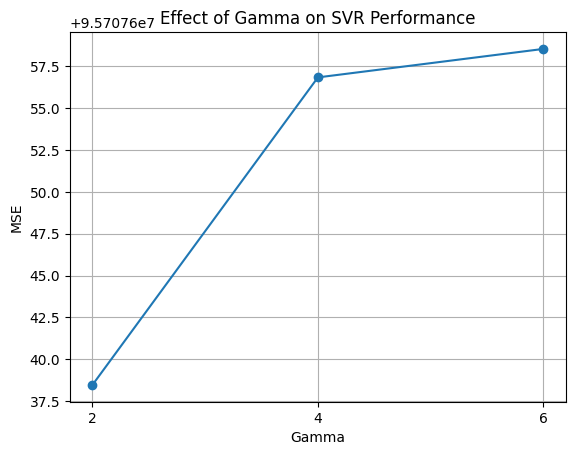

In [51]:
gamma = [2, 4, 6]
mse_scores = []
from sklearn.metrics import mean_squared_error
for g in gamma:
    svrplot_reg = SVR(gamma=g)
    svrplot_reg.fit(cars_prepared, carprice_labels)
    mse_scores.append(mean_squared_error(carprice_labels, svrplot_reg.predict(cars_prepared)))

plt.plot(gamma, mse_scores, marker='o')
plt.xlabel('Gamma')
plt.ylabel('MSE')
plt.title('Effect of Gamma on SVR Performance')
plt.xticks(gamma)
plt.grid(True)
plt.show()

*Plot visualising the effect of increasing C on our dataset*

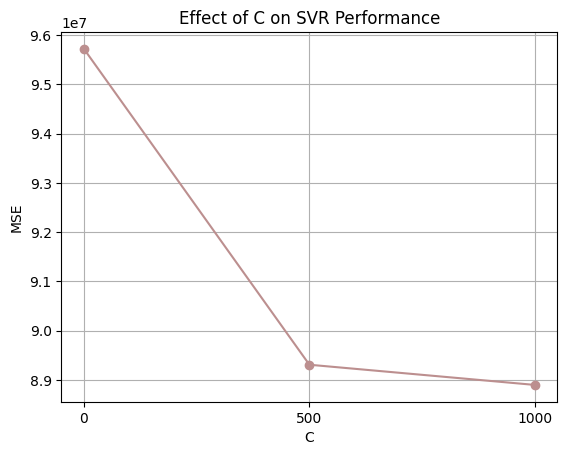

In [52]:
C = [0.001, 500, 1000]
mse_scores = []
from sklearn.metrics import mean_squared_error
for param in C:
    svrplot_reg = SVR(C=param)
    svrplot_reg.fit(cars_prepared, carprice_labels)
    mse_scores.append(mean_squared_error(carprice_labels, svrplot_reg.predict(cars_prepared)))

plt.plot(C, mse_scores, marker='o', color="rosybrown")
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('Effect of C on SVR Performance')
plt.xticks(C)
plt.grid(True)
plt.show()

**Linear SVR**

Parameters: epsilon=0.5, C=0.001

In [53]:
svm_reg1 = LinearSVR(epsilon=0.5, dual=True, C=0.001, random_state=42)
svm_reg1.fit(cars_prepared,carprice_labels)

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=0.001, dual=True, epsilon=0.5, random_state=42)

*Evaluating RMSE using 3-fold cross validation*

In [54]:
svr_rmse1 = -cross_val_score(svm_reg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse1

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



array([12713.69716577,  9720.52877402,  8019.72046329])

Parameters: epsilon=1, C = 5

In [55]:
svm_reg2 = LinearSVR(epsilon=1, dual=True, C=5, random_state=42)
svm_reg2.fit(cars_prepared,carprice_labels)

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=5, dual=True, epsilon=1, random_state=42)

*Evaluating RMSE using epsilon=1, C=5. RMSE is much lower.*

In [56]:
svr_rmse2 = -cross_val_score(svm_reg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse2

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



array([8054.720448  , 7086.65064081, 4716.99203724])

Parameters: epsilon=1.5, C = 100

In [57]:
svm_reg3 = LinearSVR(epsilon=1.5, dual=True, C=100, random_state=42)
svm_reg3.fit(cars_prepared,carprice_labels)

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=100, dual=True, epsilon=1.5, random_state=42)

*Evaluating RMSE using epsilon=1.5, C=100. RMSE is higher now.*

In [58]:
svr_rmse3 = -cross_val_score(svm_reg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse3

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



array([7941.98565914, 7234.10610629, 5781.49347258])

*Plot visualising the effect of epsilon on MSE on our dataset*

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



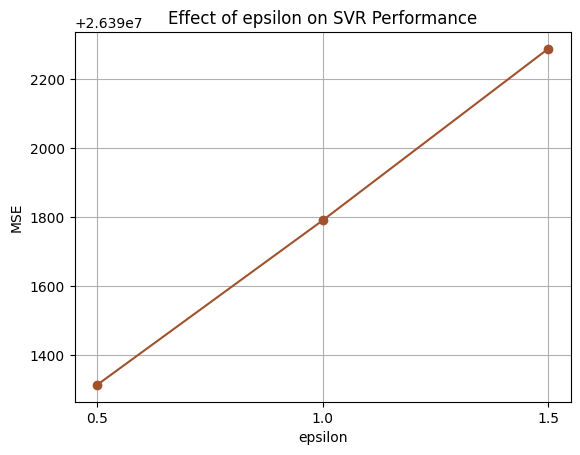

In [59]:
eps = [0.5, 1, 1.5]
mse_scores = []
from sklearn.metrics import mean_squared_error
for e in eps:
    linsvrplot_reg = LinearSVR(epsilon=e, dual=True, random_state=42)
    linsvrplot_reg.fit(cars_prepared, carprice_labels)
    mse_scores.append(mean_squared_error(carprice_labels, linsvrplot_reg.predict(cars_prepared)))

plt.plot(eps, mse_scores, marker='o', color="sienna")
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.title('Effect of epsilon on SVR Performance')
plt.xticks(eps)
plt.grid(True)
plt.show()

# Decision Tree Regression

Parameter: Max depth = 2

In [60]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(cars_prepared, carprice_labels)

DecisionTreeRegressor(max_depth=2, random_state=42)

*Evaluating using 3-fold cross validation.*

In [61]:
tree_reg_rmse1 = -cross_val_score(tree_reg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
tree_reg_rmse1

array([6020.28130279, 3614.27677725, 2655.65285955])

*Plot to visualise the regression tree of maximum depth of 2*

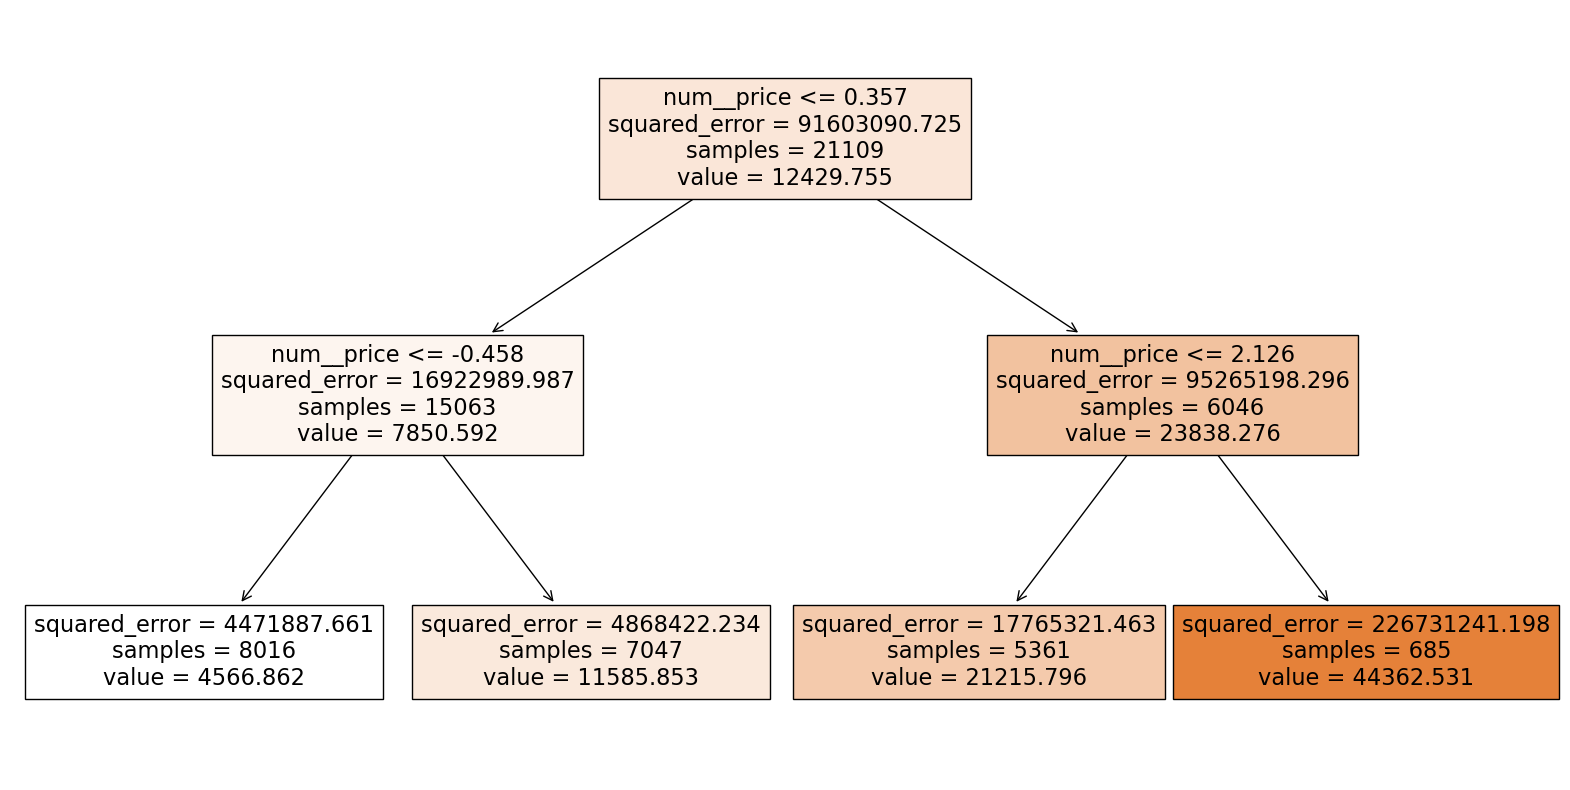

In [62]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg1, filled=True, feature_names=cars_prepared_df.columns)
plt.show()

Parameter: Max depth = 4

In [63]:
tree_reg2 = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg2.fit(cars_prepared, carprice_labels)

DecisionTreeRegressor(max_depth=4, random_state=42)

*Evaluating using max_depth=4. RMSE is significantly lower than before at depth=2.*

In [64]:
tree_reg_rmse2 = -cross_val_score(tree_reg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
tree_reg_rmse2

array([2792.20606724,  992.11034162,  773.07493843])

*Plot to visualise the regression tree of maximum depth of 4*

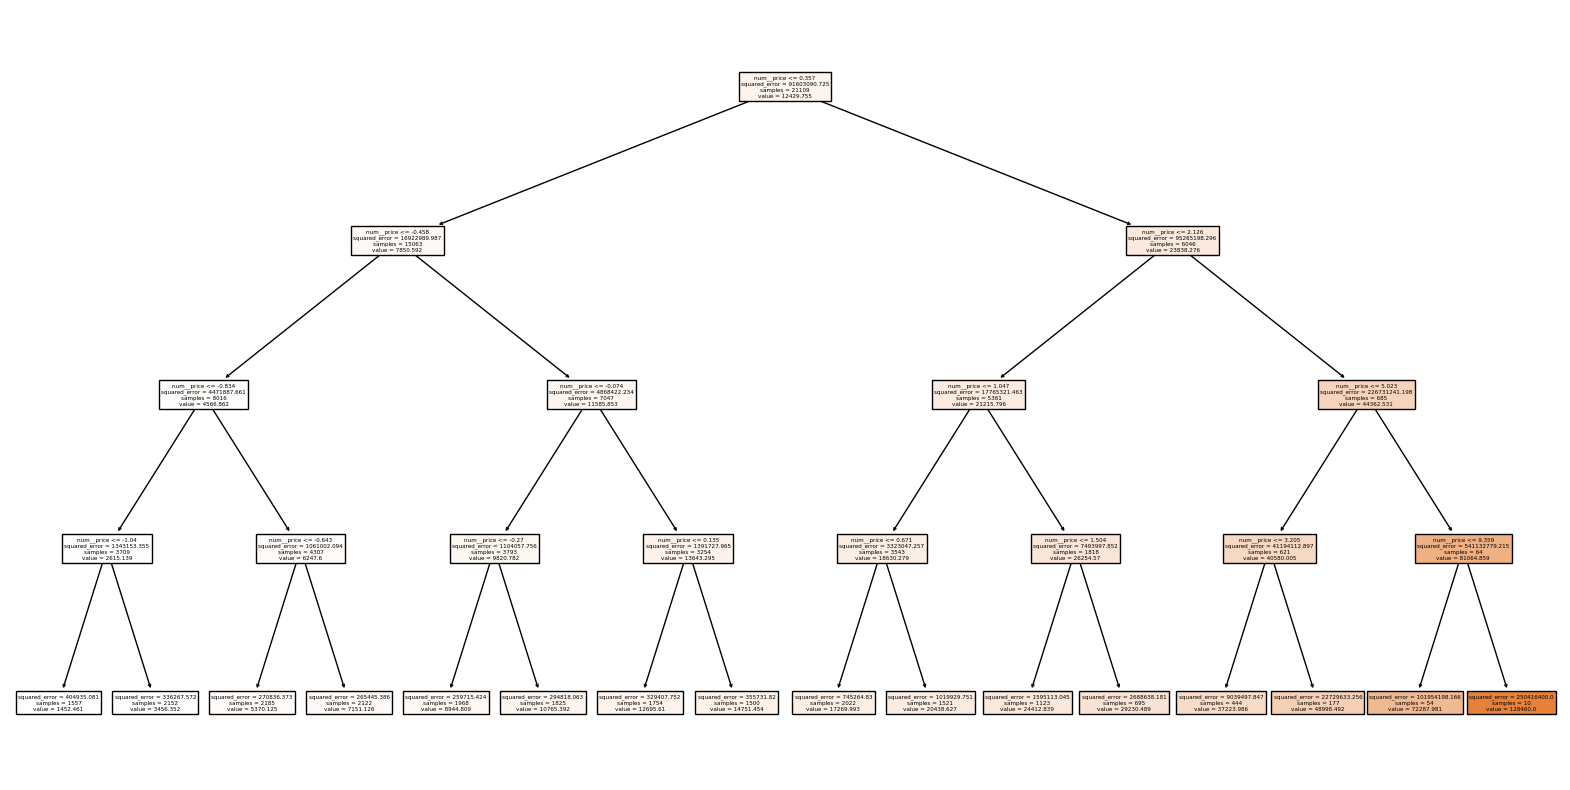

In [65]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg2, filled=True, feature_names=cars_prepared_df.columns)
plt.show()

Parameter: Max depth = 6

In [66]:
tree_reg3 = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_reg3.fit(cars_prepared, carprice_labels)

DecisionTreeRegressor(max_depth=6, random_state=42)

*Evaluating using max_depth=6. RMSE much lower once more.*

In [67]:
tree_reg_rmse3 = -cross_val_score(tree_reg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
tree_reg_rmse3

array([1189.59474984,  251.14400586,  197.81256304])

*Plot to visualise regression tree of maximum depth of 6.*

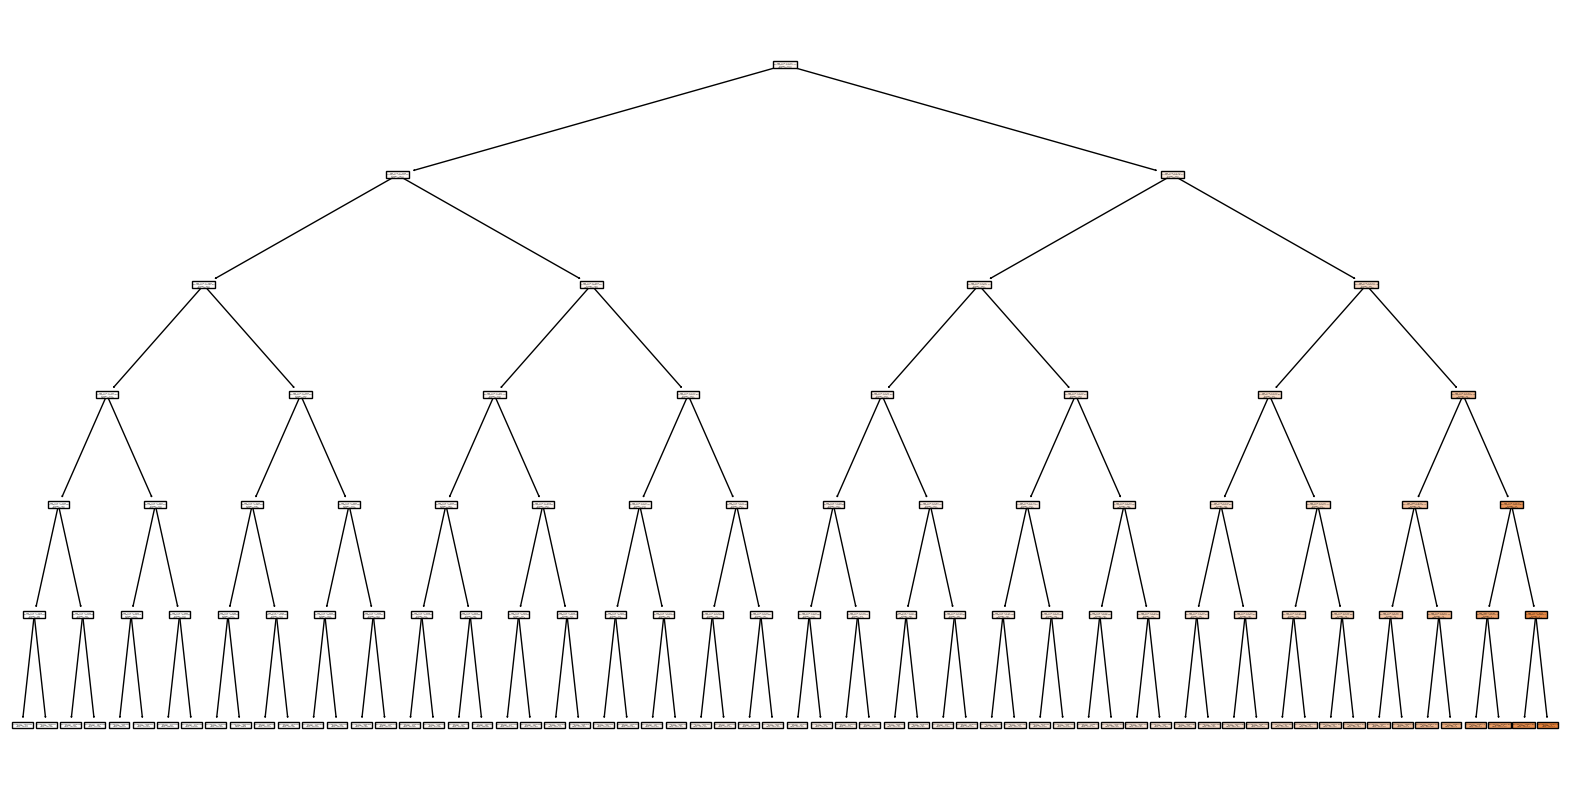

In [68]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg3, filled=True, feature_names=cars_prepared_df.columns)
plt.show()

*Plot to visualise the effect of maximum depth on RMSE*

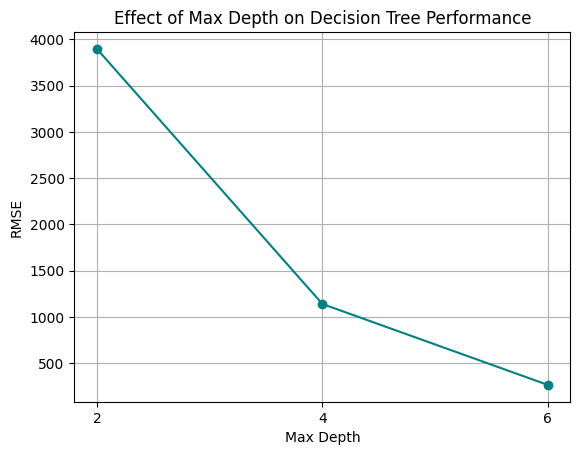

In [110]:
max_depths = [2, 4, 6]
mse_scores = []
from sklearn.metrics import root_mean_squared_error
for depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(cars_prepared, carprice_labels)
    mse_scores.append(root_mean_squared_error(carprice_labels, tree_reg.predict(cars_prepared)))

plt.plot(max_depths, mse_scores, marker='o', color="teal")
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Effect of Max Depth on Decision Tree Performance')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

# Random Forest Regressor

Parameter: Max depth = 2, n_estimators = 100, bootstrap= True, max_leaf_nodes=100

In [70]:
randforestreg1 = RandomForestRegressor(max_depth=2,n_estimators=100,bootstrap=True ,max_leaf_nodes=100, random_state=0)
randforestreg1.fit(cars_prepared, carprice_labels)

RandomForestRegressor(max_depth=2, max_leaf_nodes=100, random_state=0)

*Evaluating using 3-fold cross validation.*

In [71]:
rf_rmse1 = -cross_val_score(randforestreg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
rf_rmse1

array([5886.67021057, 3298.77761859, 2451.18051288])

Parameter: Max depth = 4, n_estimators = 200, bootstrap = True, max_leaf_nodes=100

In [72]:
randforestreg2 = RandomForestRegressor(max_depth=4,n_estimators = 200, bootstrap=True, max_leaf_nodes=100, random_state=0)
randforestreg2.fit(cars_prepared, carprice_labels)

RandomForestRegressor(max_depth=4, max_leaf_nodes=100, n_estimators=200,
                      random_state=0)

*Evaluating using Max depth = 4, n_estimators = 200, bootstrap = True, max_leaf_nodes=100. This yields better results and lower RMSE*

In [73]:
rf_rmse2 = -cross_val_score(randforestreg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
rf_rmse2

array([2237.90711699,  632.43619134,  537.89851133])

Parameter: Max depth = 6, n_estimators = 100, bootstrap= True, max_leaf_nodes=200

In [74]:
randforestreg3 = RandomForestRegressor(max_depth=6,n_estimators = 100, bootstrap=True, max_leaf_nodes=200, random_state=0)
randforestreg3.fit(cars_prepared, carprice_labels)

RandomForestRegressor(max_depth=6, max_leaf_nodes=200, random_state=0)

*Evaluating using Max depth = 6, n_estimators = 100, bootstrap = True, max_leaf_nodes=200. We see better results and lower RMSE again.*

In [75]:
rf_rmse3 = -cross_val_score(randforestreg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
rf_rmse3

array([1337.96818936,  169.95851768,   57.96781794])

*Plots to visualise predicted Vs. Actual target labels, residuals, and errors.*

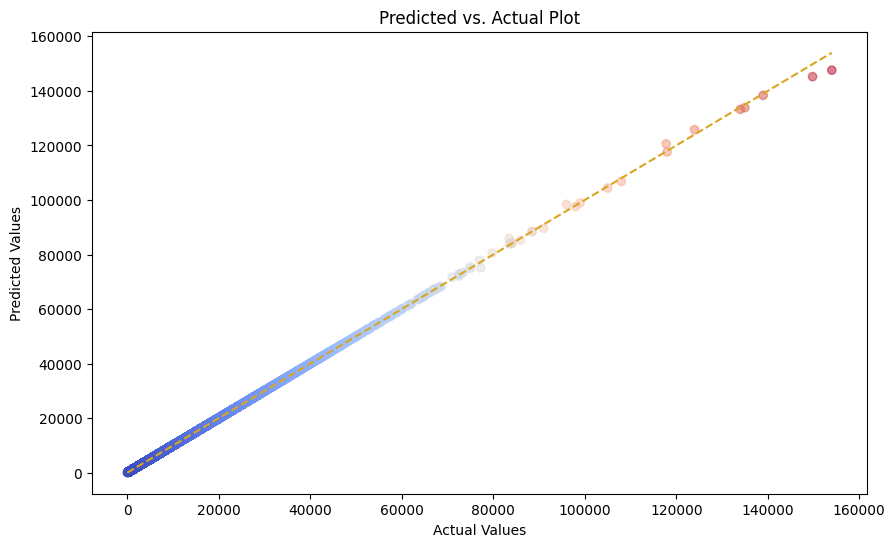

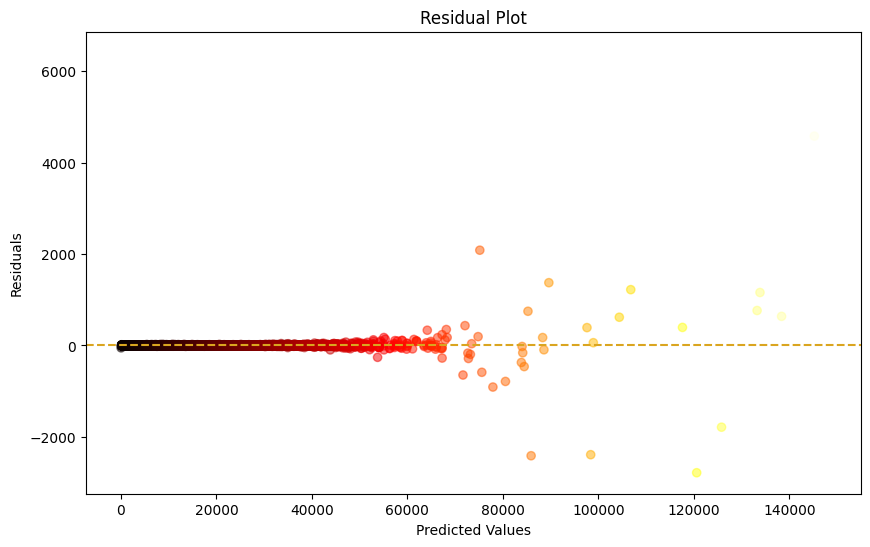

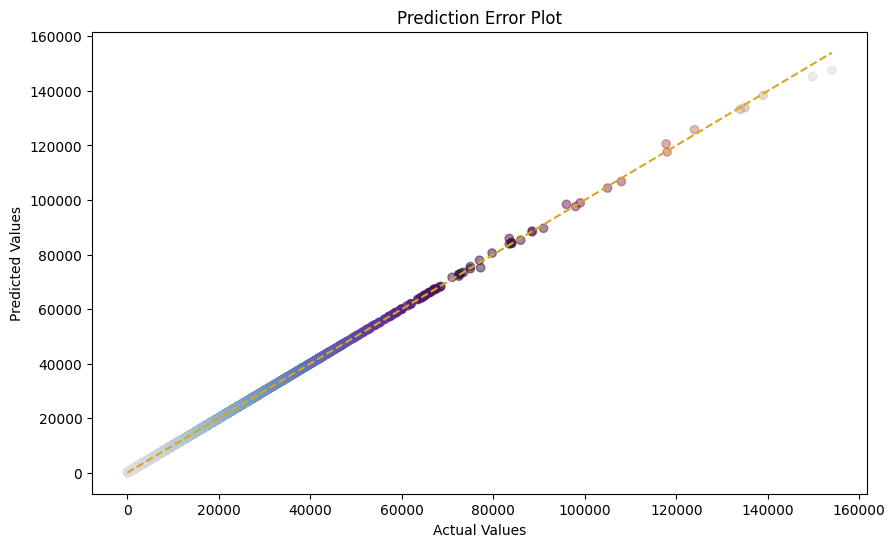

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = cars_prepared
y = carprice_labels

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X, y)

# Predictions
y_pred = forest_reg.predict(X)

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c=y, cmap='coolwarm', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='goldenrod')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.show()



# Residual Plot
y_pred = forest_reg.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, c=y, cmap='hot', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='goldenrod', linestyle='--')
plt.show()

# Prediction Error Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c=y, cmap='twilight', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='goldenrod')
plt.show()


# K-Nearest Neighbor Regressor

Parameters: n_neighbors=2

In [78]:
knn_reg1 = KNeighborsRegressor(n_neighbors=2)
knn_reg1.fit(cars_prepared, carprice_labels)

KNeighborsRegressor(n_neighbors=2)

*Evaluating using 3-fold cross validation.*

In [79]:
knn_rmse1 = -cross_val_score(knn_reg1, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
knn_rmse1

array([11043.13765126,  8866.08742683,  9508.67188293])

Parameters: n_neighbors=4

In [80]:
knn_reg2 = KNeighborsRegressor(n_neighbors=4)
knn_reg2.fit(cars_prepared, carprice_labels)

KNeighborsRegressor(n_neighbors=4)

*Evaluating using n_neighbors=4, yielding better performance.*

In [81]:
knn_rmse2 = -cross_val_score(knn_reg2, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
knn_rmse2

array([11041.14500658,  8473.94967282,  8954.73038494])

Parameters: n_neighbors=6

In [82]:
knn_reg3 = KNeighborsRegressor(n_neighbors=6)
knn_reg3.fit(cars_prepared, carprice_labels)

KNeighborsRegressor(n_neighbors=6)

*Evaluating using n_neighbors=6, lower RMSE.*

In [83]:
knn_rmse3 = -cross_val_score(knn_reg3, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
knn_rmse3

array([11063.54736672,  8270.68735098,  8639.20827464])

*Plots to visualise predicted Vs. Actual target labels, residuals, and errors.*

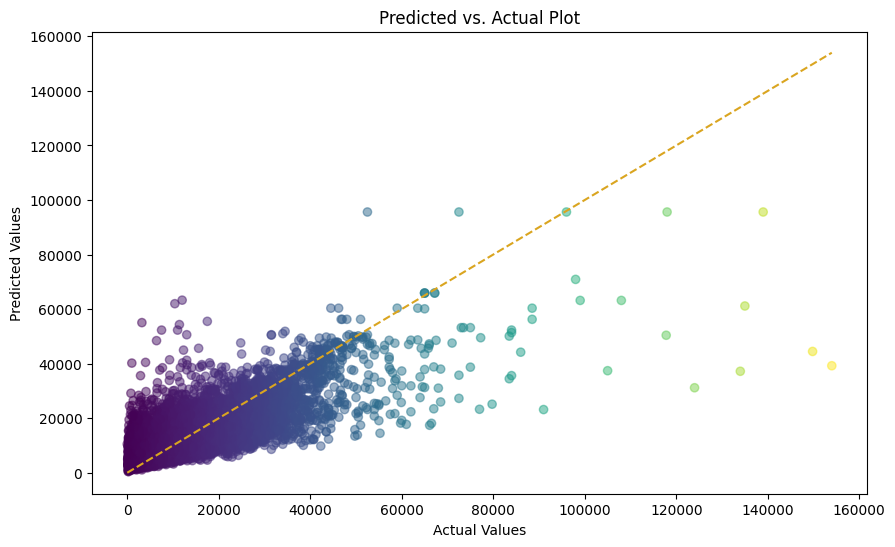

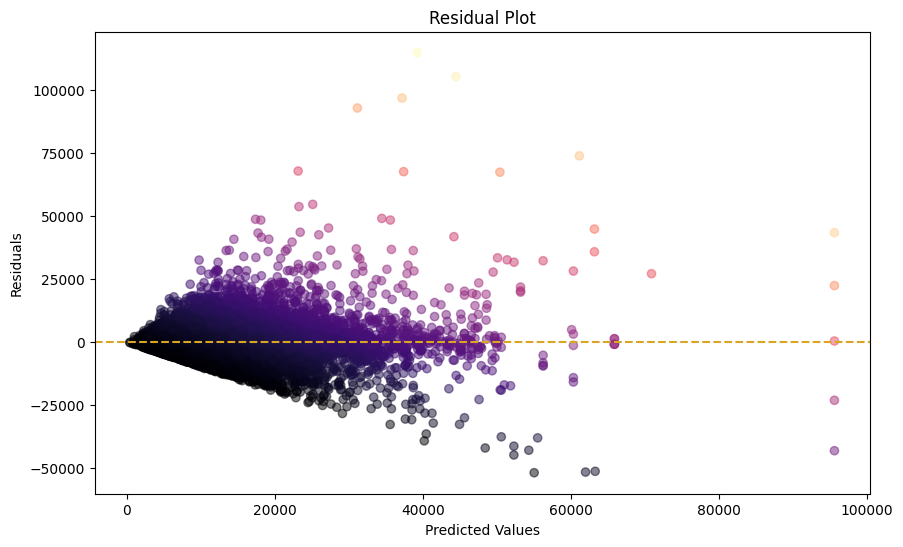

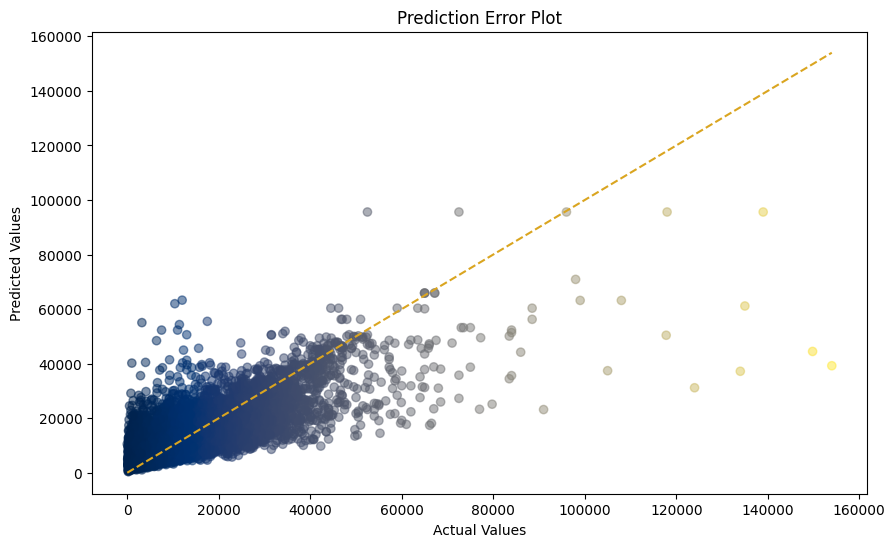

In [106]:
X = cars_prepared
y = carprice_labels
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_reg.fit(X, y)

# Predictions
y_pred = knn_reg.predict(X)

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c=y, cmap='viridis', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='goldenrod')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.show()

# Residual Plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, c= y, cmap='magma', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='goldenrod', linestyle='--')
plt.show()

# Prediction Error Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c=y, cmap='cividis', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='goldenrod')
plt.show()


**Random Forest Regressor gave the best RMSE**

Applying Grid Search to find best parameters

In [85]:
param_grid = [{'n_estimators': [300, 500], 'max_depth': [4, 5, 6], 'min_samples_split': [5, 10], 'min_samples_leaf':[2, 4], 'max_leaf_nodes':[50, 100], 'n_jobs':[-1]}]
grid_search = GridSearchCV(randforestreg1, param_grid, cv=5)
grid_search.fit(cars_prepared[:5000], carprice_labels[:5000])

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=2, max_leaf_nodes=100,
                                             random_state=0),
             param_grid=[{'max_depth': [4, 5, 6], 'max_leaf_nodes': [50, 100],
                          'min_samples_leaf': [2, 4],
                          'min_samples_split': [5, 10],
                          'n_estimators': [300, 500], 'n_jobs': [-1]}])

*Finding best paramters*

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_leaf_nodes=100, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=500, n_jobs=-1,
                      random_state=0)

*Finding the best score for the best paramteres*

In [87]:
grid_search.best_score_

0.9894457174812592

*Plotting results*

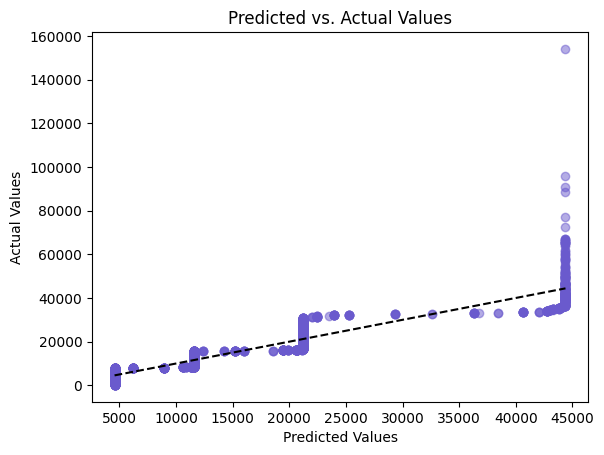

In [104]:
predicted_values=randforestreg1.predict(cars_prepared)

plt.scatter(predicted_values[:5000], carprice_labels[:5000], alpha=0.5, color="slateblue")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(predicted_values), max(predicted_values)], [min(predicted_values), max(predicted_values)], color='black', linestyle='--')  # Optional diagonal line
plt.show()

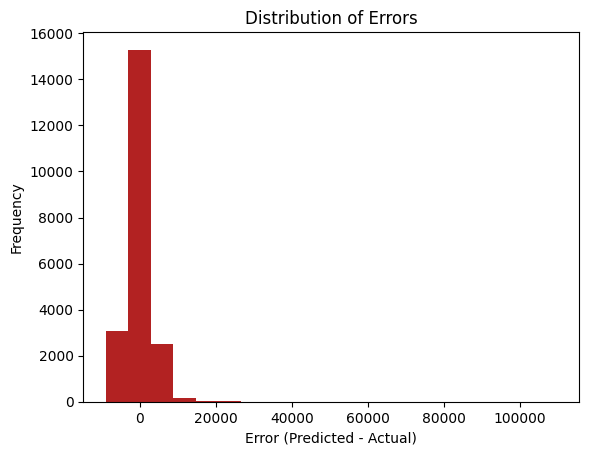

In [90]:
plt.hist(carprice_labels-predicted_values, bins=20, color='firebrick')
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")
plt.show()

# New Regressors

*In this section, we explore new Regressors by creating, fitting, tampering with their parameters, and finding the best results using 3-fold cross validation.*

**Ridge Regressor**

Ridge Regression is a linear regression method that incorporates L2 regularization to address multicollinearity and overfitting issues.
The regularization parameter (𝛼) controls the trade-off between fitting the training data well and keeping the model simple.

In [91]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(cars_prepared,carprice_labels)

Ridge(alpha=0.1)

In [92]:
ridge_reg_rmse = -cross_val_score(ridge_reg, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
ridge_reg_rmse

array([0.47865369, 0.2989382 , 0.27071658])

**Lasso Regressor**

Lasso Regression is another variant of linear regression that incorporates L1 regularization. It works similarly to Ridge Regression but with a few key differences. 

In [93]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(cars_prepared,carprice_labels)

Lasso(alpha=0.1)

In [94]:
lasso_reg_rmse = -cross_val_score(lasso_reg, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
lasso_reg_rmse

array([10.96852787,  6.76804311,  5.79584126])

**Elastic Net Regressor**

Elastic Net is a linear regression technique that combines the penalties of both Lasso (L1 regularization) and Ridge (L2 regularization) regressions. It addresses some of the limitations of each method while retaining their advantages. 
 Elastic Net combines the feature selection capabilities of Lasso with the ability of Ridge to handle correlated predictors. This makes it particularly useful when dealing with high-dimensional datasets with collinear features.

In [95]:
elastic_net_reg = ElasticNet(random_state=42)
elastic_net_reg.fit(cars_prepared,carprice_labels)

ElasticNet(random_state=42)

In [96]:
elastic_net_reg_rmse = -cross_val_score(elastic_net_reg, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
elastic_net_reg_rmse

array([3673.10808123, 2178.14124846, 1695.83738404])

**Gradient Boosting Regressor**

Gradient Boosting Regressor is a powerful ensemble learning technique that builds a strong predictive model by combining multiple weak learners, typically decision trees. The algorithm starts by initializing the ensemble with a simple model, often just the mean of the target variable, after that it sequentially builds a series of decision trees, with each subsequent tree aiming to correct the errors made by the previous ones.

In [97]:
gradient_reg = GradientBoostingRegressor(random_state=42)
gradient_reg.fit(cars_prepared,carprice_labels)

GradientBoostingRegressor(random_state=42)

In [98]:
gradient_reg_rmse = -cross_val_score(gradient_reg, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
gradient_reg_rmse

array([626.03925303, 112.02081848,  84.80081742])

**Gaussian Process Regressor**

Gaussian Process Regression (GPR) is a non-parametric Bayesian approach to regression that models the distribution of functions, rather than estimating a single function as in traditional regression techniques. 

In [99]:
gaussian_reg = GaussianProcessRegressor(random_state=42)
gaussian_reg.fit(cars_prepared,carprice_labels)

GaussianProcessRegressor(random_state=42)

In [100]:
gaussian_reg_rmse = -cross_val_score(gaussian_reg, cars_prepared, carprice_labels, scoring="neg_root_mean_squared_error", cv=3)
gaussian_reg_rmse

array([18841.46983068, 16122.265293  , 11092.17587898])

*Plot to show the regressors*

C:\Users\tasne\AppData\Local\Temp\ipykernel_24920\3002466815.py:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "gd" (-> color='g'). The keyword argument will take precedence.

C:\Users\tasne\AppData\Local\Temp\ipykernel_24920\3002466815.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.

C:\Users\tasne\AppData\Local\Temp\ipykernel_24920\3002466815.py:25: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



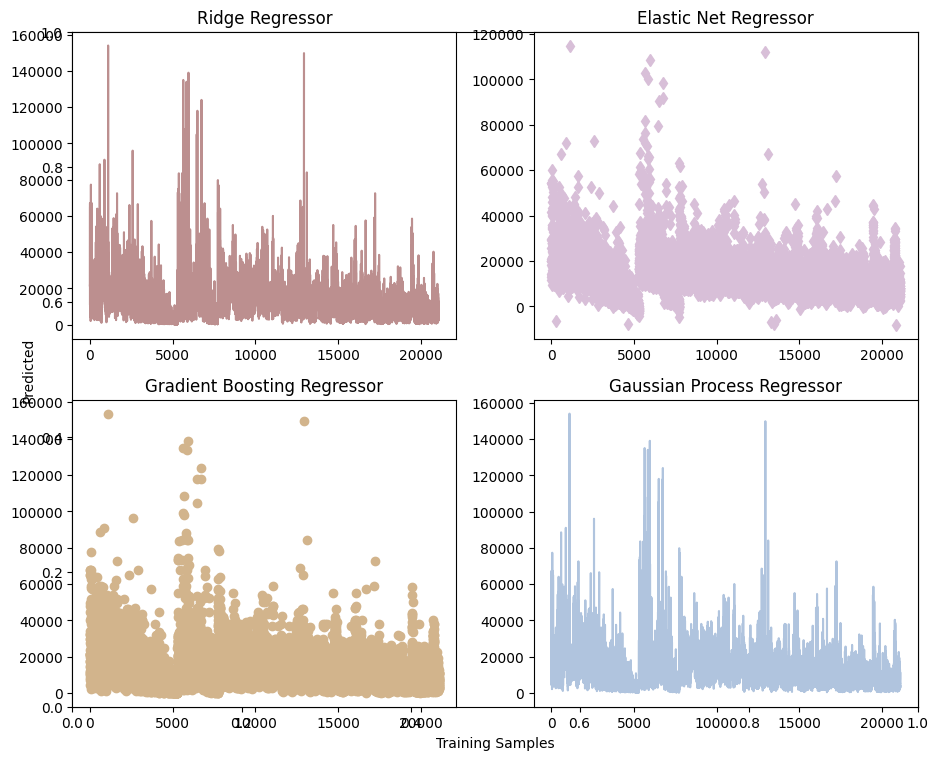

In [107]:
ridge_pred = ridge_reg.predict(cars_prepared)
elastic_pred = elastic_net_reg.predict(cars_prepared)
gradient_pred = gradient_reg.predict(cars_prepared)
gaussian_pred = gaussian_reg.predict(cars_prepared)

plt.figure(figsize=(10, 8))
plt.ylabel("Predicted")
plt.xlabel("Training Samples")

plt.subplot(2, 2, 1)
plt.plot(ridge_pred, color='rosybrown')
plt.title("Ridge Regressor")


plt.subplot(2, 2, 2)
plt.plot(elastic_pred, "gd", color='thistle')
plt.title("Elastic Net Regressor")

plt.subplot(2, 2, 3)
plt.plot(gradient_pred, "ro",  color='tan')
plt.title("Gradient Boosting Regressor")


plt.subplot(2, 2, 4)
plt.plot(gaussian_pred, "r", ms=10, color='lightsteelblue')
plt.title("Gaussian Process Regressor")


plt.tight_layout() 
plt.show()